In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import random as rd
import matplotlib.pyplot as pl
from timeit import default_timer as timer

import tsp_pythran
from tsp_pythran import TSP, run_tests, Compiler

## Compile / Remove `.so` files
+ **IMPORTANT**: Restart kernel after compiling

In [3]:
c = Compiler()
c.run(force=False)
#c.remove()

compile dir = /home/Olivier/tsp-pythran/tsp_pythran
tsp_compute_single_threaded already compiled
tsp_compute_multi_threaded_omp already compiled


## Performance Tests
I ran this notebook on 3 machines
+ iMac named 'Central'
+ MBPro named 'Satellite'
+ Linux VM named 'xyz'

In [4]:
def which_machine():
    stdout = !uname -a
    name = stdout[0]
    if 'Central' in name: return 'iMac'
    elif 'Satellite' in name: return 'MBPro'
    else: return 'LinuxVM'

def how_many_cores():
    if which_machine() in ['iMac', 'MBPro']:
        stdout = !sysctl hw.physicalcpu
        nb_core = int(stdout[0].split(' ')[-1])
    else:
        stdout = !lscpu | grep -E '^Thread|^CPU\('
        nb_cpu = int(stdout[0].split(' ')[-1])
        nb_thread_per_core = int(stdout[1].split(' ')[-1])
        nb_core = int(nb_cpu/nb_thread_per_core)
    return nb_core

def is_concurrent_pythran_module():
    if hasattr(tsp_pythran.tsp_compute_single_threaded, '__pythran__'):
        return 'pythran'
    return 'python'

def is_omp_pythran_module():
    if hasattr(tsp_pythran.tsp_compute_multi_threaded_omp, '__pythran__'):
        return 'pythran'
    return 'python'

machine = which_machine()
nb_core = how_many_cores()
lang_concurrent = is_concurrent_pythran_module()
lang_omp = is_omp_pythran_module()

print(f'Machine: {machine} with {nb_core} cores')
print(f'Module concurrent:\t{lang_concurrent}')
print(f'Module omp:\t\t{lang_omp}')


Machine: LinuxVM with 32 cores
Module concurrent:	pythran
Module omp:		pythran


## Set Params

In [5]:
nb_city = 100
nb_step = int(1e6)

beta_mult = 1.02
accept_nb_step = 100
p1 = 0.2
p2 = 0.8

nb_run = 1
tsp_1 = TSP(nb_city, nb_run, nb_step, beta_mult, accept_nb_step, p1, p2)
tsp_1.show_params()

nb_run = nb_core
tsp_N = TSP(nb_city, nb_run, nb_step, beta_mult, accept_nb_step, p1, p2)
tsp_N.show_params()

value
param                     
nb_city             100.00
nb_run               32.00
nb_step         1000000.00
beta_mult             1.02
accept_nb_step      100.00
p1                    0.20
p2                    0.80

value
param                     
nb_city             100.00
nb_run                4.00
nb_step         1000000.00
beta_mult             1.02
accept_nb_step      100.00
p1                    0.20
p2                    0.80

## Generate Cities

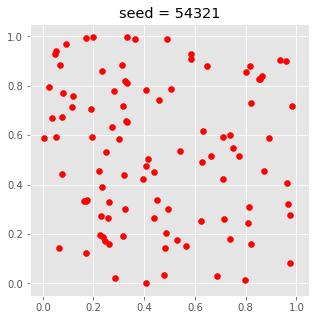

In [6]:
seed = 54321
tsp_1.generate_cities(seed=seed)
tsp_N.generate_cities(seed=seed)

tsp_N.show_cities()

## 1 - Search - Concurrent - No signature check

start search
task 1/1 done
run time = 2.07 s
results saved to dump/perf-pythran-LinuxVM-1-concurrent-nosig/results.json


distance
solution          
0         8.225056

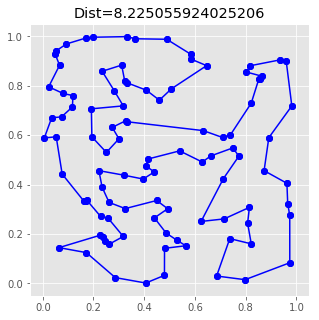

In [7]:
tsp_1.search_concurrent(f'perf-{lang_concurrent}-{machine}-1-concurrent-nosig',
                      max_workers=nb_core, check_signature=False, dated=False)
tsp_1.save_results()
tsp_1.show_results(nb_best=3, save=True)

start search
task 7/32 done
task 12/32 done
task 11/32 done
task 17/32 done
task 8/32 done
task 9/32 done
task 19/32 done
task 1/32 done
task 26/32 done
task 22/32 done
task 16/32 done
task 28/32 done
task 21/32 done
task 29/32 done
task 27/32 done
task 3/32 done
task 20/32 done
task 13/32 done
task 25/32 done
task 32/32 done
task 23/32 done
task 15/32 done
task 30/32 done
task 24/32 done
task 4/32 done
task 6/32 done
task 14/32 done
task 31/32 done
task 5/32 done
task 18/32 done
task 2/32 done
task 10/32 done
run time = 2.30 s
results saved to dump/perf-pythran-LinuxVM-32-concurrent-nosig/results.json


distance
solution          
19        7.935386
0         7.937282
12        7.962480
3         7.980412
6         7.986410
14        7.990686
23        8.023517
30        8.033416
11        8.035362
7         8.036240
20        8.040124
29        8.049845
31        8.049991
8         8.059244
28        8.060638
2         8.062534
27        8.067924
25        8.074651
26        8.077577
24        8.085563
21        8.089791
5         8.090088
18        8.094896
13        8.114556
10        8.127177
22        8.127274
15        8.136520
4         8.144179
1         8.151008
9         8.162953
17        8.166549
16        8.211749

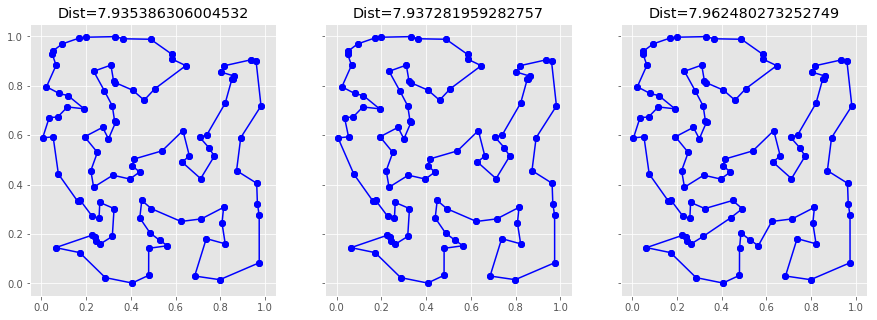

In [8]:
tsp_N.search_concurrent(f'perf-{lang_concurrent}-{machine}-{nb_core}-concurrent-nosig',
                      max_workers=nb_core, check_signature=False, dated=False)
tsp_N.save_results()
tsp_N.show_results(nb_best=3, save=True)

## 2 - Search - OMP - No signature check

start search
run time = 23.29 s
results saved to dump/perf-pythran-LinuxVM-32-omp-nosig/results.json


distance
solution          
5         7.959538
16        7.961870
30        7.977099
9         7.984957
27        7.986410
19        7.999075
11        8.000037
8         8.009875
6         8.010964
1         8.012509
14        8.023517
26        8.032130
23        8.033342
29        8.036521
15        8.062901
3         8.084356
0         8.114082
25        8.117663
13        8.121588
12        8.130683
4         8.134692
17        8.136235
2         8.138943
18        8.148509
28        8.149970
21        8.156586
22        8.159708
7         8.164732
31        8.167189
24        8.172982
20        8.185123
10        8.324473

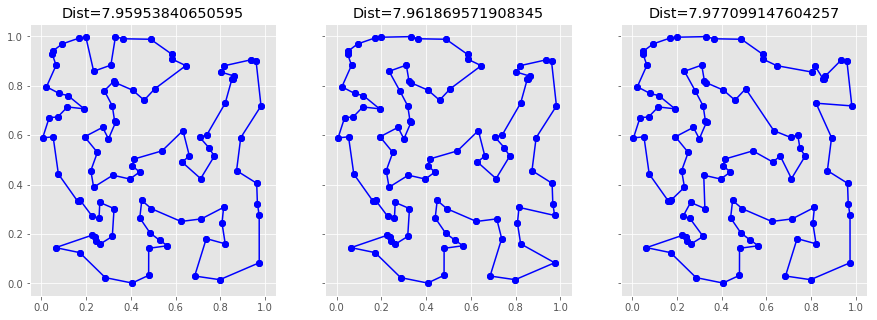

In [10]:
if lang_omp == 'pythran':
    tsp_N.search_omp(f'perf-{lang_omp}-{machine}-{nb_core}-omp-nosig', 
                     check_signature=False, dated=False)
    tsp_N.save_results()
    tsp_N.show_results(nb_best=3, save=True)